In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno


In [2]:
#load the data

raw_data = pd.read_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\breast_cancer_data\METABRIC_RNA_Mutation.csv')

C:\Users\leann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.info

<bound method DataFrame.info of       patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellula

In [4]:
raw_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [5]:
column_names= raw_data.columns
print(column_names)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)


In [6]:
#check for missing data.
missing = pd.concat([raw_data.isnull().sum(),100*raw_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing = missing.sort_values(by='Count',ascending=False)
missing.head(30)

,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
cancer_type_detailed,15,0.787815


It looks like tumor_stage is missing from 26% of patients, 3-gene_classifier_subtype from 12% of patients, primary_tumor_laterality from 6% of patients. 

One is missing data from the death_from_cancer column, and as that is probably the most important column we'll probably want to cut that. 

I should look at all the data that is missing.

In [7]:
# Next look at non-numeric columns. 

raw_data.select_dtypes('object')

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0,0,0,0,0,0,0,0,0,0
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#I want to get index and column nme for all my columns

column_names=pd.DataFrame(columns=['index_number', 'column_name'])

for i, col in enumerate(raw_data.columns):
   column_names = column_names.append({'column_name': col, 'index_number': i}, ignore_index=True)

column_names.set_index('index_number', inplace=True)
column_names.head(100)

#I will also need a list of the column names:

column_name_list = list(raw_data.columns)
column_name_list

['patient_id',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'overall_survival_months',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',

I see that columns 0:30 are clinical attributes, and from 31 on it is genetic data. I know that part of that is z scores and part of that is mutations. I think I need to divide this into 3 different data sets, and keep the patient ID as the constant in all of them. 



In [9]:
#I want to find datatype of the Z score data -it is float64. 
raw_data['cul1'].describe()

count    1.904000e+03
mean     6.302521e-07
std      1.000262e+00
min     -3.179400e+00
25%     -6.318000e-01
50%     -6.660000e-02
75%      4.961000e-01
max      5.621200e+00
Name: cul1, dtype: float64

In [10]:
print('Columns in column_names: ', column_names)

Columns in column_names:                           column_name
index_number                        
0                         patient_id
1                   age_at_diagnosis
2             type_of_breast_surgery
3                        cancer_type
4               cancer_type_detailed
...                              ...
688                         hras_mut
689                        prps2_mut
690                      smarcb1_mut
691                        stmn2_mut
692                        siah1_mut

[693 rows x 1 columns]


In [11]:
# see if we have any dupliated data... we do not!

print('duplicate rows: ',raw_data.duplicated().sum())


print('duplicate columns: ', raw_data.duplicated(subset=column_name_list).sum())

duplicate rows:  0
duplicate columns:  0


### splitting the data into 3 buckets
This is mostly so that I can clean up my clinical data, and see how many columns I have for each section of my data.

### GETTING MY Z SCORE DATAFRAME (z_scores):

In [12]:
#make dataframe of only Z score data. I can see that it included clinical data but not patient IDs. Need to fix this. 

z_scores= raw_data.select_dtypes(include=['float64'])
print('z_score info: ',z_scores.info())

z_scores.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 498 entries, age_at_diagnosis to ugt2b7
dtypes: float64(498)
memory usage: 7.2 MB
z_score info:  None


,age_at_diagnosis,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,brca1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,75.65,1.0,3.0,10.0,NaN,6.044,140.500000,22.0,2.0,-1.3990,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,43.19,1.0,3.0,0.0,2.0,4.020,84.633333,10.0,1.0,-1.3800,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,48.87,1.0,2.0,1.0,2.0,4.030,163.700000,15.0,2.0,0.0670,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,47.68,1.0,2.0,3.0,1.0,4.050,164.933333,25.0,2.0,0.6744,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,76.97,1.0,3.0,8.0,2.0,6.080,41.366667,40.0,2.0,1.2932,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [13]:
# dropping the clinical data, and starting with z-scores. 
z_scores = z_scores.drop(z_scores.loc[: , : 'tumor_stage'], axis = 1)
z_scores.head()

#add back in patient_id from raw_data:
z_scores=z_scores.join(raw_data['patient_id'],how='left')

#put it at the beginning of the DF, moving it from the end:
z_scores.insert(0, 'patient_id', z_scores.pop('patient_id'))
z_scores.head()


,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


### GET PATIENT CLINICAL ATTRIBUTES DATAFRAME (clinical_data):

In [14]:
clinical_data = raw_data.loc[: , :'tumor_stage']
clinical_data.head(50)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.0,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.0,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,1.0,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.0,5.032,IDC,36.566667,0,Negative,1,ER+/HER2- High Prolif,16.0,2.0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,5.0,3.056,ILC,36.266667,0,Negative,0,ER+/HER2- High Prolif,28.0,2.0


### GET GENE MUTATION DATAFRAME (genes):

In [15]:
genes = raw_data.drop(raw_data.loc[: , : 'ugt2b7'], axis = 1)
genes.head()

#add back in patient_id like above
genes=genes.join(raw_data['patient_id'],how='left')

#put it at the beginning of the DF, moving it from the end:
genes.insert(0, 'patient_id', genes.pop('patient_id'))
genes.head()



,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### CLINICAL DATA

In [16]:
#let's look at the data in the clinical attributes. 

for col in clinical_data:
    print(col)
        
#look at missing data here
missing_clinical = pd.concat([clinical_data.isnull().sum(),100*clinical_data.isnull().mean()], axis=1)
missing_clinical.columns=['Count', '%']
missing_clinical = missing.sort_values(by='Count',ascending=False)
missing_clinical.head(13)

#I'M CONFUSED... there is no 'death_from_cancer' column but it's listed here and I don't know where it comes from. 

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage


,Count,%
tumor_stage,501,26.313025
3-gene_classifier_subtype,204,10.714286
primary_tumor_laterality,106,5.567227
neoplasm_histologic_grade,72,3.781513
cellularity,54,2.836134
mutation_count,45,2.363445
er_status_measured_by_ihc,30,1.575630
type_of_breast_surgery,22,1.155462
tumor_size,20,1.050420
oncotree_code,15,0.787815


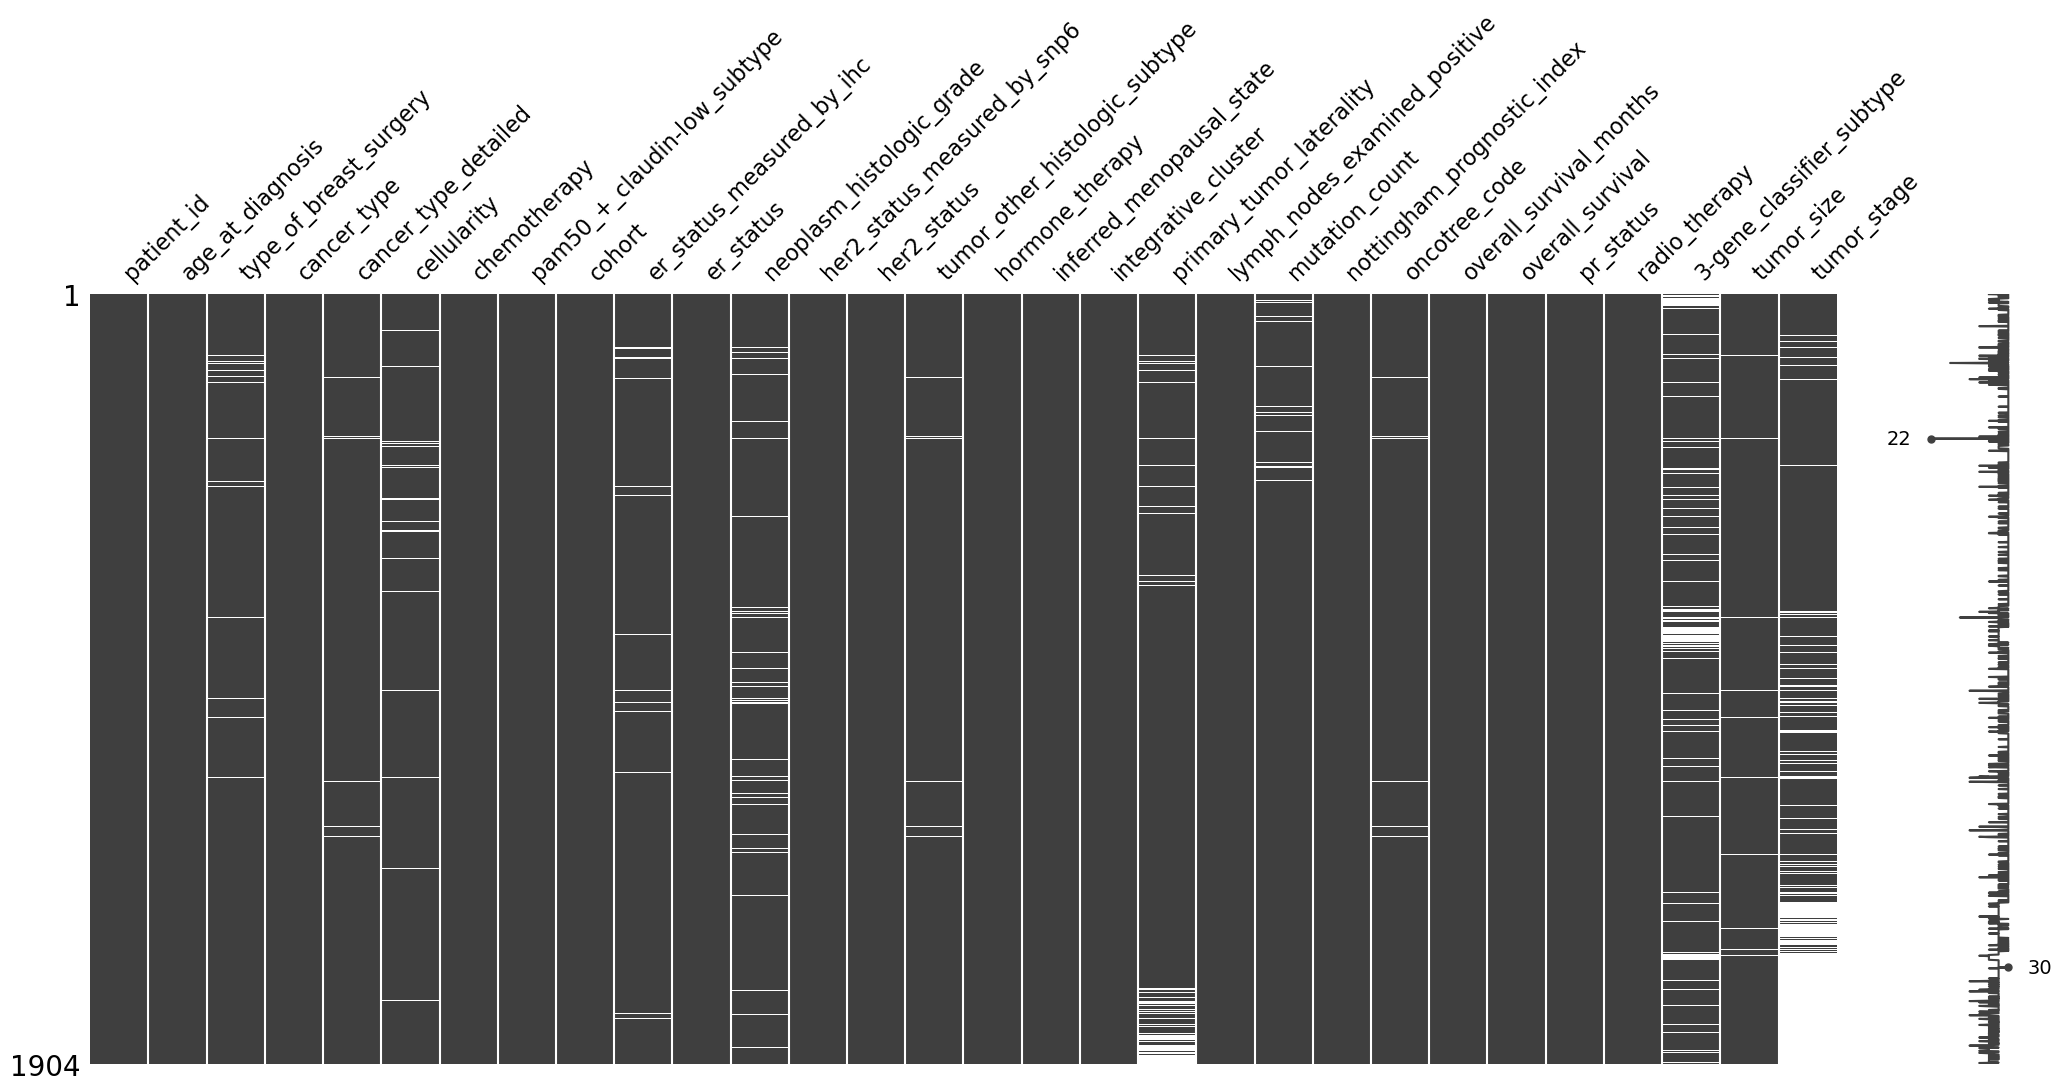

In [17]:
#I want to visualize the missing data...i can see the primary_tumor_laterality, 3_gene_classifier_subtype, 
#and tumor_stage all are all missing chunks of data

msno.matrix(clinical_data)
plt.show()

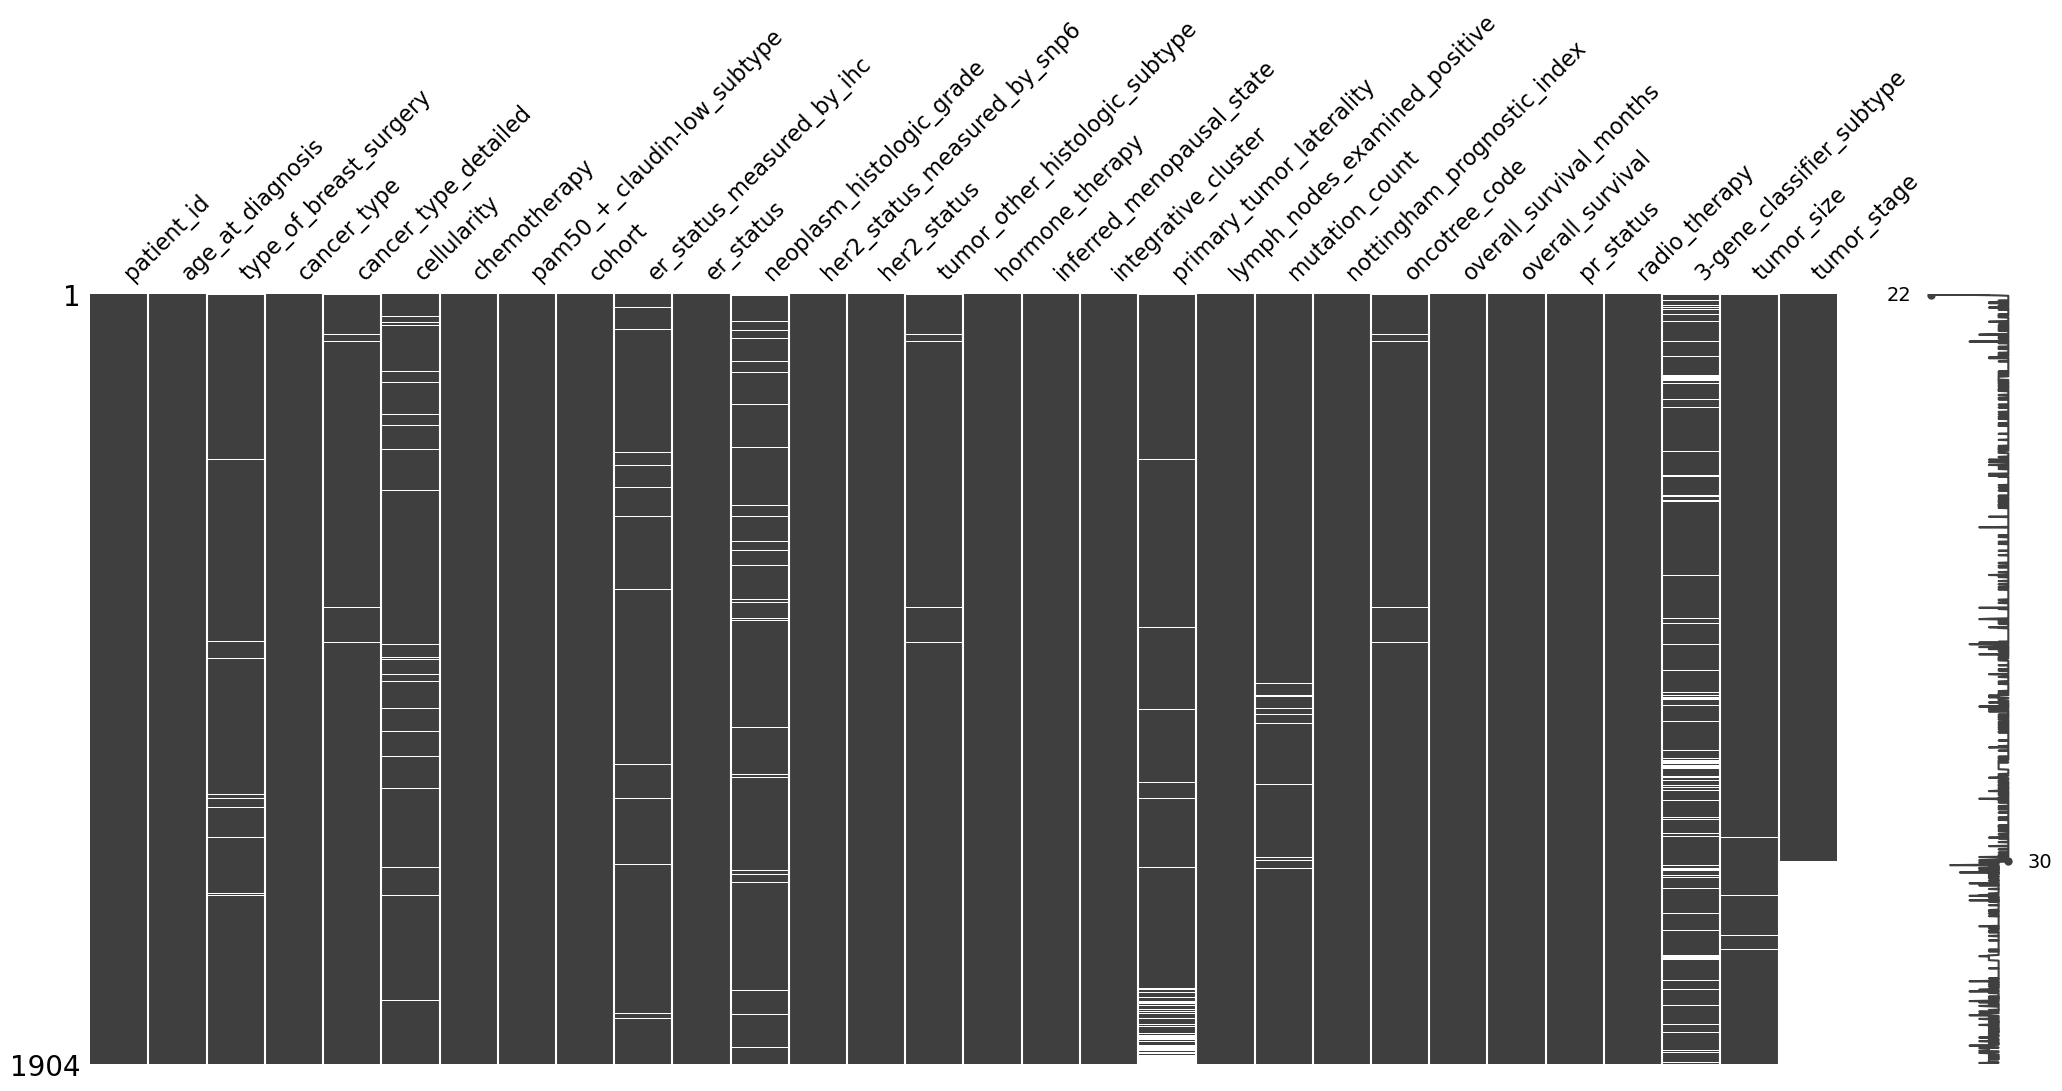

In [18]:
#I want to see if there are patterns in the missing data, so I'm sorting by each column that appears to be missing a lot,
#separately.

clinical_data_sorted = clinical_data.sort_values(by = 'tumor_stage')
msno.matrix(clinical_data_sorted)
plt.show()

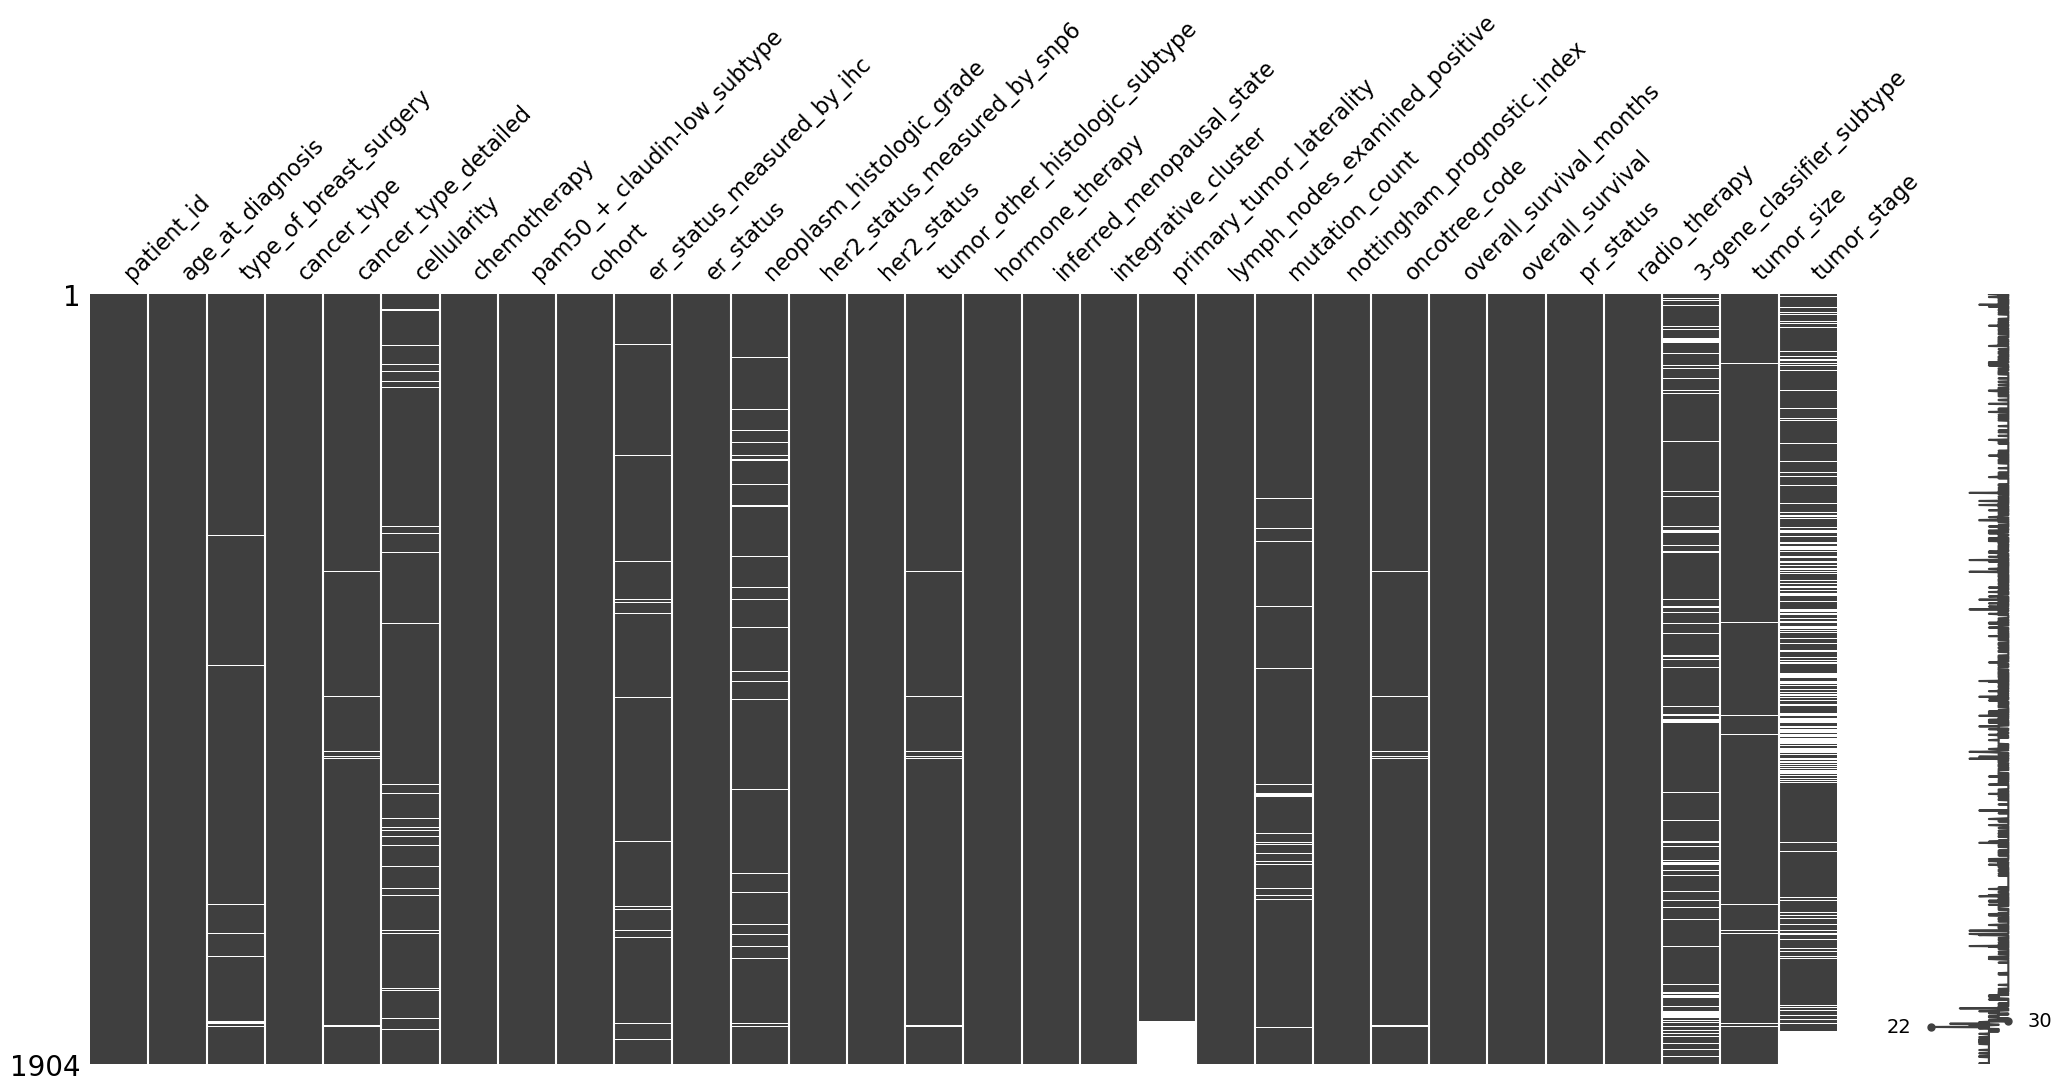

In [19]:
clinical_data_sorted = clinical_data.sort_values(by = 'primary_tumor_laterality')
msno.matrix(clinical_data_sorted)
plt.show()

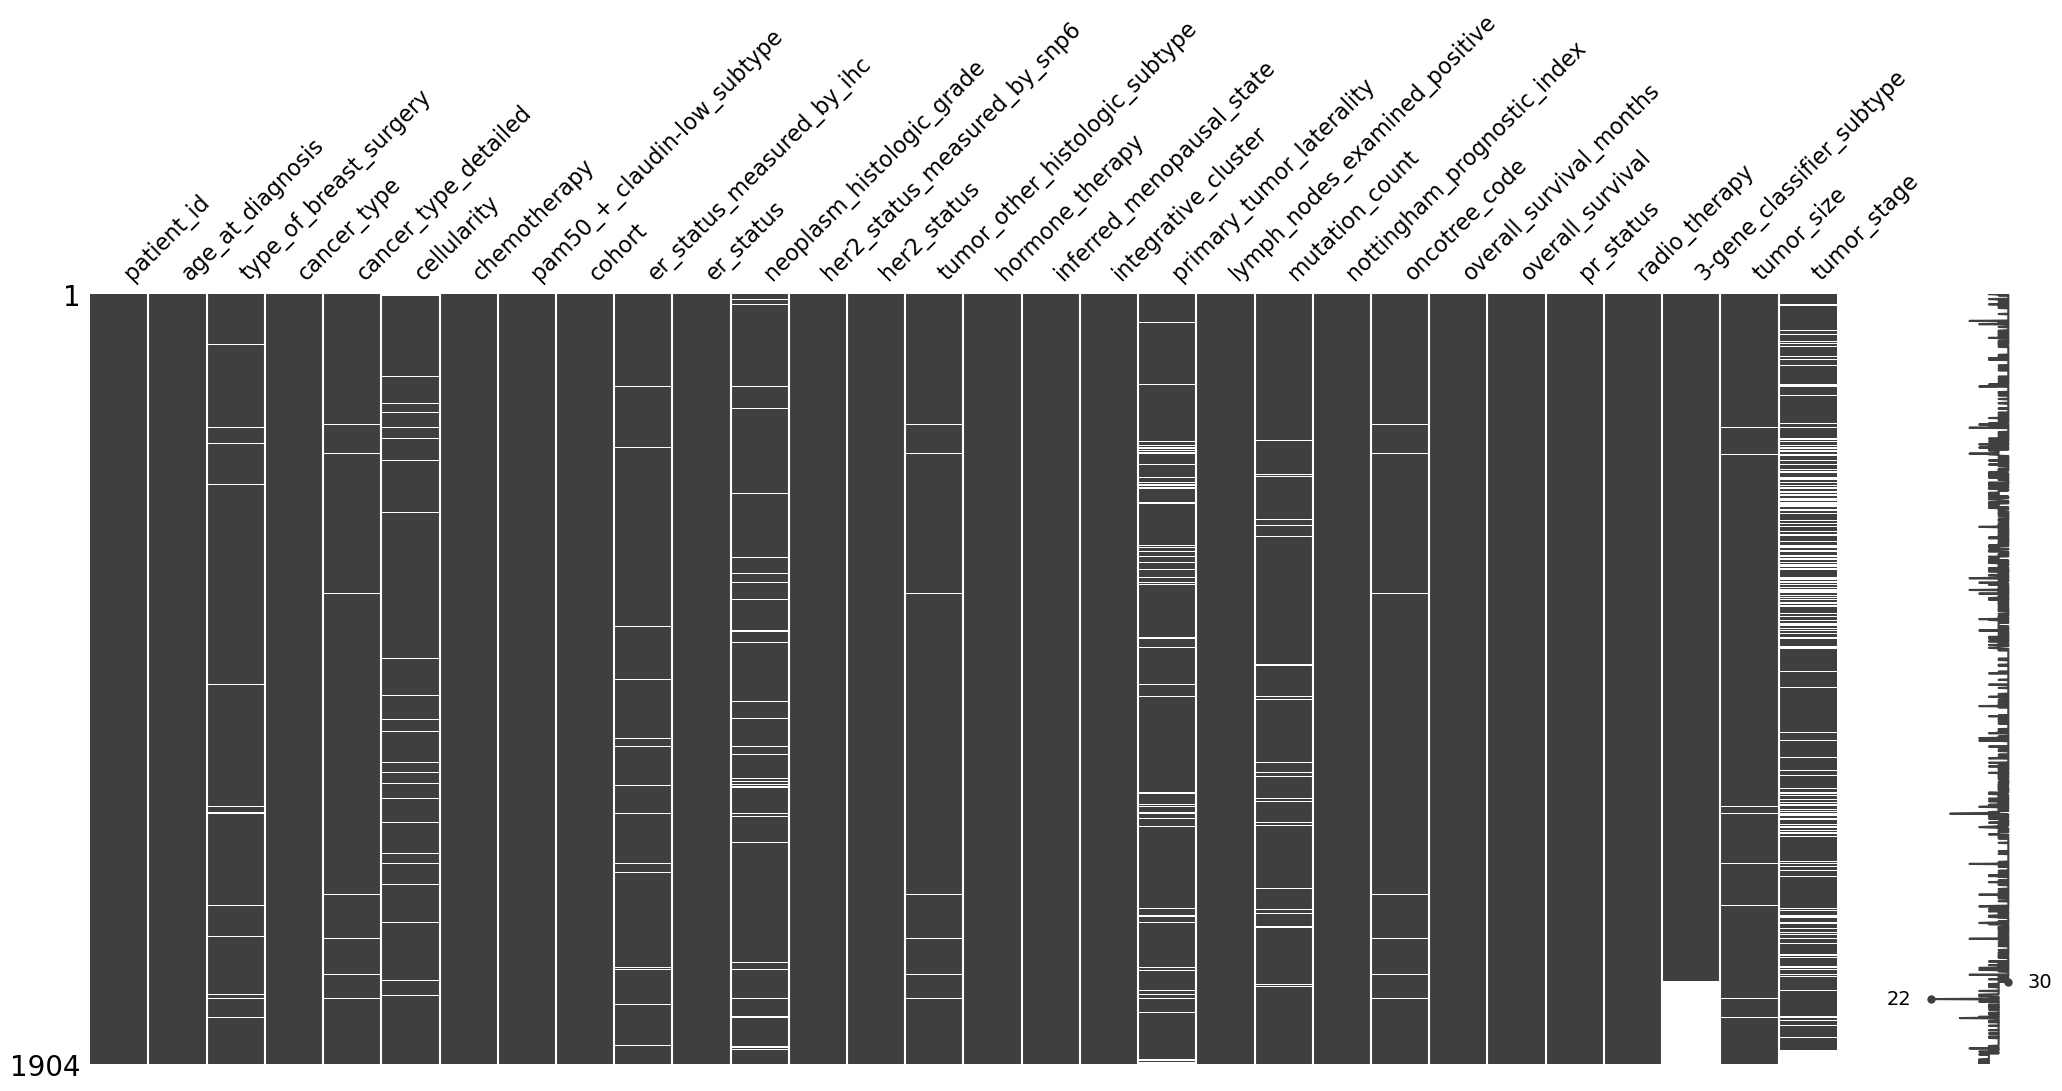

In [20]:
clinical_data_sorted = clinical_data.sort_values(by = '3-gene_classifier_subtype')
msno.matrix(clinical_data_sorted)
plt.show()

The only pattern I see is that most of the patients that are missing data from 'primary_tumor_laterality' is also missing 'tumor_stage. I'd like to see if they are in the same cohort or if they have something else in common - will look at missing primary_tumor_laterality, as that's where the overlap is. 

In [21]:
#isolate missing and complete values alside
missing_laterality= clinical_data[clinical_data['primary_tumor_laterality'].isna()]

missing_laterality.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 36 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      106 non-null    int64  
 1   age_at_diagnosis                106 non-null    float64
 2   type_of_breast_surgery          95 non-null     object 
 3   cancer_type                     106 non-null    object 
 4   cancer_type_detailed            104 non-null    object 
 5   cellularity                     104 non-null    object 
 6   chemotherapy                    106 non-null    int64  
 7   pam50_+_claudin-low_subtype     106 non-null    object 
 8   cohort                          106 non-null    float64
 9   er_status_measured_by_ihc       100 non-null    object 
 10  er_status                       106 non-null    object 
 11  neoplasm_histologic_grade       103 non-null    float64
 12  her2_status_measured_by_snp6    10

In [22]:
#I see that most of the missing data for laterality/staging is from cohort 4, and none from cohorts 3 or 5. 

missing_laterality_grouped=missing_laterality.groupby(by=["cohort"]).count()
missing_laterality_grouped.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
cohort,,,,,,,,,,,,,,,,,,,,,
1.0,18,18,7,18,16,17,18,18,16,18,...,17,18,16,18,18,18,18,14,15,14
2.0,7,7,7,7,7,6,7,7,7,7,...,7,7,7,7,7,7,7,6,7,7
4.0,81,81,81,81,81,81,81,81,77,81,...,81,81,81,81,81,81,81,73,81,0


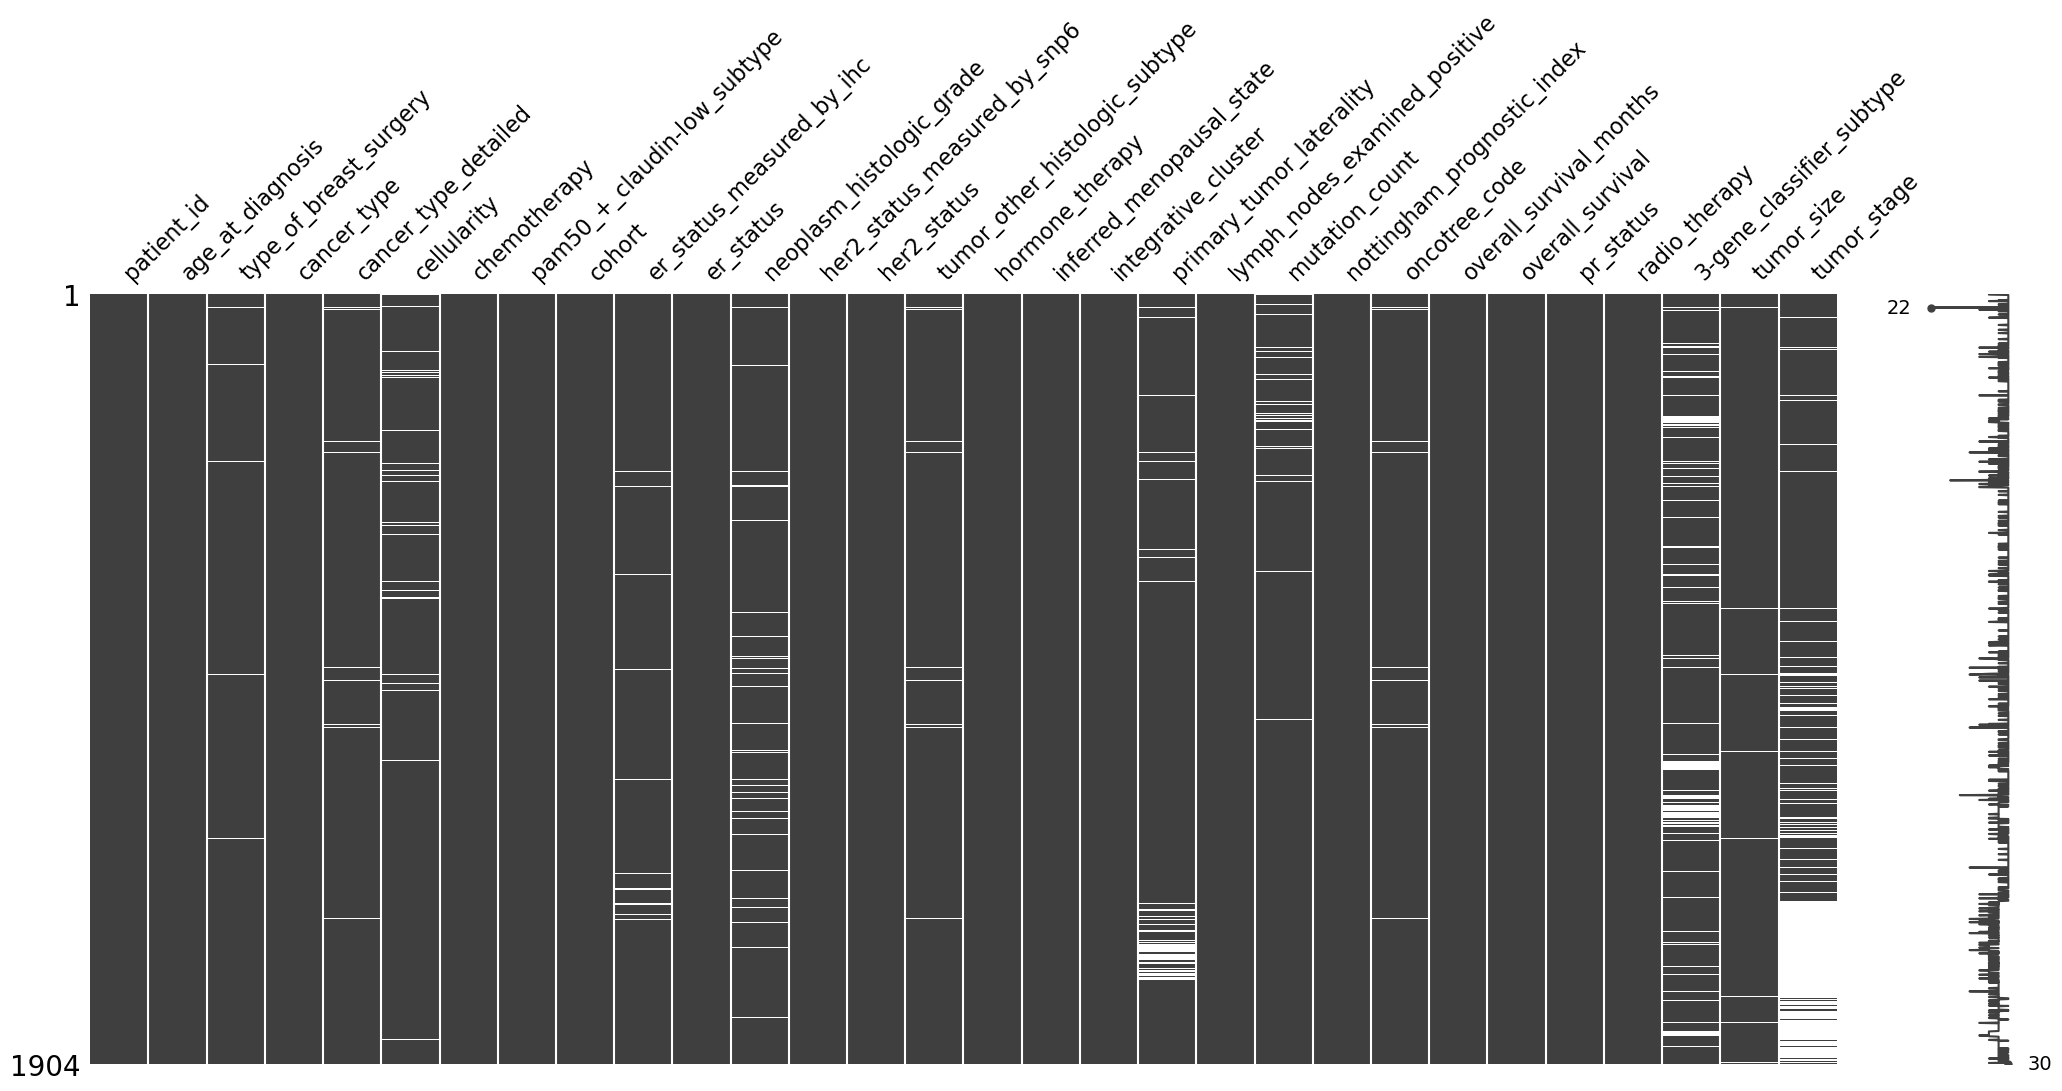

In [23]:
#want to look at missingness sorting by cohort - not sure if this tells me anything meaningful. 
clinical_data_sorted = clinical_data.sort_values(by = 'cohort')
msno.matrix(clinical_data_sorted)
plt.show()

In [24]:
# I'm looking just at cohort 4, which includes 236 patients. 
pd.set_option('display.max_rows', 300)
cohort4= clinical_data[clinical_data['cohort'] == 4]
cohort4

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
1668,7000,69.28,MASTECTOMY,Breast Cancer,Breast,Moderate,0,LumB,4.0,Positve,...,9.0,4.02200,BREAST,97.400000,1,Positive,0,ER+/HER2- High Prolif,11.00,NaN
1669,7001,72.71,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4.0,Positve,...,9.0,3.02000,IDC,102.700000,1,Negative,1,HER2+,10.00,NaN
1670,7002,74.52,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,7.0,3.03200,IDC,57.933333,1,Positive,0,ER+/HER2- High Prolif,16.00,NaN
1671,7003,50.44,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,Normal,4.0,Positve,...,5.0,4.05400,IDC,91.233333,0,Positive,0,ER+/HER2- Low Prolif,27.00,NaN
1672,7004,74.20,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,Moderate,0,LumA,4.0,Positve,...,9.0,5.06000,ILC,50.466667,1,Negative,1,ER+/HER2- Low Prolif,30.00,NaN
1673,7005,70.84,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,2.0,3.05200,IDC,45.333333,1,Negative,1,ER+/HER2- Low Prolif,26.00,NaN
1674,7006,58.80,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,LumA,4.0,Positve,...,11.0,3.03800,IDC,109.933333,1,Positive,1,ER+/HER2- Low Prolif,19.00,NaN
1675,7007,54.44,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,Basal,4.0,Negative,...,7.0,5.03400,IDC,58.600000,1,Negative,1,ER-/HER2-,17.00,NaN
1676,7008,69.94,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,4.0,Negative,...,2.0,4.04800,IDC,50.900000,0,Negative,0,ER-/HER2-,24.00,NaN
1677,7009,68.28,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,Basal,4.0,Negative,...,3.0,5.05400,IDC,54.766667,0,Negative,1,ER-/HER2-,27.00,NaN


In [25]:
#look at missing data here
missing_cohort4 = pd.concat([cohort4.isnull().sum(),100*cohort4.isnull().mean()], axis=1)
missing_cohort4 .columns=['Count', '%']
missing_cohort4  = missing_cohort4.sort_values(by='Count',ascending=False)
missing_cohort4

,Count,%
tumor_stage,236,100.000000
primary_tumor_laterality,81,34.322034
3-gene_classifier_subtype,14,5.932203
neoplasm_histologic_grade,9,3.813559
er_status_measured_by_ihc,7,2.966102
cancer_type_detailed,5,2.118644
tumor_other_histologic_subtype,5,2.118644
oncotree_code,5,2.118644
cellularity,2,0.847458
mutation_count,0,0.000000


Ah ha! It looks like NONE of the patients from cohort 4 have their tumor stage recorded! And about 34% are missing laterality. What should I do about this? 

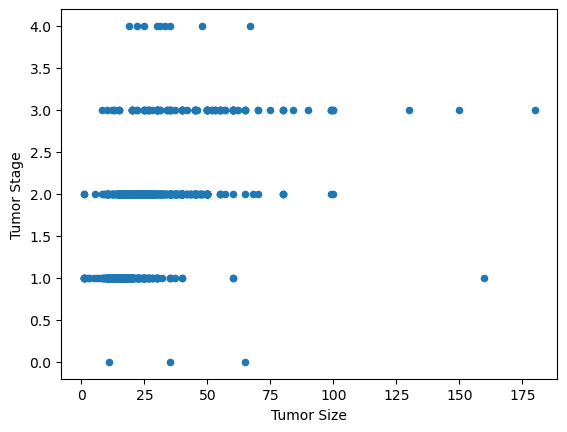

In [26]:
# I want to see if I can impute tumor stage from tumor size - looking at their relationship

ax=clinical_data.plot(kind='scatter', x='tumor_size', y='tumor_stage')
ax.set_xlabel("Tumor Size")
ax.set_ylabel("Tumor Stage")
plt.show()

I do see some trends here but I think I'll need to do some sort of machine learning to impute this value if it ends up being important. 

In [27]:
#looking at datatypes for my clinical data to see if I need to convert any of them. 
print(clinical_data.dtypes)

#want to see our data again
clinical_data.head()

patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      object
overall_survival_months           

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0


In [28]:
#make loop to find unique values in each column, to see which should be converted to categorical data type

for col in clinical_data:
    print('\n',col, ': ', clinical_data[col].unique())


 patient_id :  [   0    2    5 ... 7297 7298 7299]

 age_at_diagnosis :  [75.65 43.19 48.87 ... 43.1  42.88 60.02]

 type_of_breast_surgery :  ['MASTECTOMY' 'BREAST CONSERVING' nan]

 cancer_type :  ['Breast Cancer' 'Breast Sarcoma']

 cancer_type_detailed :  ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer']

 cellularity :  [nan 'High' 'Moderate' 'Low']

 chemotherapy :  [0 1]

 pam50_+_claudin-low_subtype :  ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']

 cohort :  [1. 2. 3. 5. 4.]

 er_status_measured_by_ihc :  ['Positve' 'Negative' nan]

 er_status :  ['Positive' 'Negative']

 neoplasm_histologic_grade :  [ 3.  2.  1. nan]

 her2_status_measured_by_snp6 :  ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']

 her2_status :  ['Negative' 'Positive']

 tumor_other_histologic_subtype :  ['Ductal/NST' 'Mixed' 'Lobular' 'Tubular/ cribrifor

columns that should NOT become categorical:
 age_at_diagnosis 
 lymph_nodes_examined_positive
 integrative_cluster
 mutation_count
 nottingham_prognostic_index
 overall_survival_months
 tumor_size
 
 Want to write a loop that converts everything else to a category

In [29]:
not_cat = clinical_data[['age_at_diagnosis', 'lymph_nodes_examined_positive','integrative_cluster','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']]
not_cat.head()

for col in clinical_data.columns:
    if col not in not_cat.columns:
        clinical_data[col]=clinical_data[col].astype('category')
print(clinical_data.dtypes)

patient_id                        category
age_at_diagnosis                   float64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive      float64
mutation_count                     float64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

In [30]:
# FIXING OTHER THINGS

#I think age can be rounded to the year, as an int64
clinical_data['age_at_diagnosis']=clinical_data['age_at_diagnosis'].astype('int64')


#the word 'positive' was spelled incorrectly...fixing
clinical_data['er_status_measured_by_ihc'] = clinical_data['er_status_measured_by_ihc'].replace('Positve','Positive')

# wanted to remove the decimal for cohort
clinical_data['cohort']=clinical_data['cohort'].astype('int64')
clinical_data['cohort']=clinical_data['cohort'].astype('category')


#this should be integer, not a float
clinical_data['lymph_nodes_examined_positive']=clinical_data['lymph_nodes_examined_positive'].astype('int64')

#couldn't convert to integer for mutation_count because of the nans... going to replace those with a '0'
clinical_data['mutation_count'] = clinical_data['mutation_count'].fillna(0).astype('int64')


# for  overall_survival_months there are too many decimal places. I think we are ok with just 1. 
clinical_data['overall_survival_months']=clinical_data['overall_survival_months'].round(1)



In [31]:
clinical_data.dtypes

patient_id                        category
age_at_diagnosis                     int64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster                 object
primary_tumor_laterality          category
lymph_nodes_examined_positive        int64
mutation_count                       int64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_sur

### Z SCORES CLEANING

In [32]:
# looking at data types. I don't need to fix anything here. 
z_scores.dtypes

patient_id      int64
brca1         float64
brca2         float64
palb2         float64
pten          float64
               ...   
tnk2          float64
tulp4         float64
ugt2b15       float64
ugt2b17       float64
ugt2b7        float64
Length: 490, dtype: object

In [33]:
z_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 490 entries, patient_id to ugt2b7
dtypes: float64(489), int64(1)
memory usage: 7.1 MB


In [34]:
z_scores.describe()

,patient_id,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03
mean,3921.982143,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,-1.175530e-16,-3.676471e-07,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,-1.256581e-17,-1.953386e-18
std,2358.478332,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262e+00,1.000262e+00
min,0.000000,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600e+00,-1.051600e+00
25%,896.500000,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-7.385500e-01,-6.667750e-01,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-4.762000e-01,-7.260000e-01
50%,4730.500000,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-1.311000e-01,-1.445000e-02,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-1.334000e-01,-4.248000e-01
75%,5536.250000,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,5.431250e-01,6.387250e-01,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,2.703750e-01,4.284000e-01
max,7299.000000,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200e+00,5.371300e+00,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,1.264390e+01,3.284400e+00


In [35]:
#look at missing data here... no data is missing!
missing_zscores = pd.concat([z_scores.isnull().sum(),100*z_scores.isnull().mean()], axis=1)
missing_zscores.columns=['Count', '%']
missing_zscores  = missing_zscores.sort_values(by='Count',ascending=False)
missing_zscores

,Count,%
patient_id,0,0.0
ctnna1,0,0.0
col6a3,0,0.0
col22a1,0,0.0
col12a1,0,0.0
...,...,...
erbb4,0,0.0
erbb3,0,0.0
erbb2,0,0.0
eif5a2,0,0.0


### GENE EXPRESSIONS CLEANING

In [36]:
#this is fine as far as datatypes go

genes.dtypes


patient_id        int64
pik3ca_mut       object
tp53_mut         object
muc16_mut        object
ahnak2_mut       object
kmt2c_mut        object
syne1_mut        object
gata3_mut        object
map3k1_mut       object
ahnak_mut        object
dnah11_mut       object
cdh1_mut         object
dnah2_mut        object
kmt2d_mut        object
ush2a_mut        object
ryr2_mut         object
dnah5_mut        object
herc2_mut        object
pde4dip_mut      object
akap9_mut        object
tg_mut           object
birc6_mut        object
utrn_mut         object
tbx3_mut         object
col6a3_mut       object
arid1a_mut       object
lama2_mut        object
notch1_mut       object
cbfb_mut         object
ncor2_mut        object
col12a1_mut      object
col22a1_mut      object
pten_mut         object
akt1_mut         object
atr_mut          object
thada_mut        object
ncor1_mut        object
stab2_mut        object
myh9_mut         object
runx1_mut        object
nf1_mut          object
map2k4_mut      

In [37]:
genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 174 entries, patient_id to siah1_mut
dtypes: int64(1), object(173)
memory usage: 2.5+ MB


In [38]:
genes.head()

,patient_id,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,H178P,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,H1047R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,E542K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,S241F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#look at missing data here... no data is missing!
missing_genes = pd.concat([genes.isnull().sum(),100*genes.isnull().mean()], axis=1)
missing_genes.columns=['Count', '%']
missing_genes = missing_genes.sort_values(by='Count',ascending=False)
missing_genes

,Count,%
patient_id,0,0.0
ttyh1_mut,0,0.0
men1_mut,0,0.0
stk11_mut,0,0.0
sik2_mut,0,0.0
ptpn22_mut,0,0.0
brip1_mut,0,0.0
flt3_mut,0,0.0
nrg3_mut,0,0.0
fbxw7_mut,0,0.0


### Merging our data frames back into one

In [40]:
cancer_data = pd.merge(clinical_data, z_scores, on='patient_id')
cancer_data = pd.merge(cancer_data, genes, on='patient_id')

cancer_data.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positive,...,0,0,0,0,0,0,0,0,0,0
1,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positive,...,0,0,0,0,0,0,0,0,0,0
2,5,48,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
3,6,47,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
4,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
5,10,78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
6,14,56,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
7,22,89,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1,Positive,...,0,0,0,0,0,0,0,0,0,0
8,28,86,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positive,...,0,0,0,0,0,0,0,0,0,0
9,35,84,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1,Negative,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#exporting the cleaned dataframe

cancer_data.to_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\capstone 2\cancer_data_cleaned.csv', encoding='utf-8')
